In [1]:
import re
import requests
import pandas as pd
import holoviews as hv
import networkx as nx
from holoviews import opts
from bs4 import BeautifulSoup
from urllib.request import urljoin


In [2]:
sites = "https://www.google.com/" #@param {type:"string"}
depth = 3 #@param {type:"slider", min:1, max:10, step:1}
max_child = 10 #@param {type:"slider", min:1, max:100, step:1}

def crawl(sites, depth=1, current_depth=0, max_child=10):
    get_links = lambda site: pd.Series(urljoin(site, tag.get('href')) for tag in BeautifulSoup(requests.get(site).text).find_all('a')).drop_duplicates().head(max_child)
    
    sites = sites.append(pd.DataFrame([{'link': link, 'parent': site, 'depth': current_depth + 1}
                                       for site in sites[sites.depth == current_depth].link
                                       for link in get_links(site)]), 
                         ignore_index=True).drop_duplicates('link')
    
    if depth > current_depth + 1:
        return crawl(sites, depth=depth, current_depth=current_depth+1, max_child=max_child)
    else:
        return sites


result = crawl(sites=pd.DataFrame([{'link': site, 'depth': 0, 'parent': site} for site in sites.split()]), 
               max_child=max_child,
               depth=depth)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27004\3924043328.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sites = sites.append(pd.DataFrame([{'link': link, 'parent': site, 'depth': current_depth + 1}
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27004\3924043328.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sites = sites.append(pd.DataFrame([{'link': link, 'parent': site, 'depth': current_depth + 1}
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27004\3924043328.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sites = sites.append(pd.DataFrame([{'link': link, 'parent': site, 'depth': current_depth + 1}


In [3]:
result

,link,depth,parent
0,https://www.google.com/,0,https://www.google.com/
1,https://www.google.com/imghp?hl=km&tab=wi,1,https://www.google.com/
2,https://maps.google.com.kh/maps?hl=km&tab=wl,1,https://www.google.com/
3,https://play.google.com/?hl=km&tab=w8,1,https://www.google.com/
4,https://news.google.com/?tab=wn,1,https://www.google.com/
...,...,...,...
487,https://support.google.com/websearch/?hl=en,3,https://support.google.com/websearch/?p=displa...
488,https://support.google.com/websearch/community...,3,https://support.google.com/websearch/?p=displa...
491,https://support.google.com/websearch/?p=result...,3,https://support.google.com/websearch/?p=result...
495,https://accounts.google.com/ServiceLogin?hl=en...,3,https://support.google.com/websearch/?p=result...


In [4]:
# this is just the example scenarios
# from the results you can see the links "https://support.google.com/websearch", "https://play.google.com"
# it could be the all services google site

In [6]:
#Task : write the regular expression to get all the services of google
from urllib.parse import urlparse

def get_google_service_name(url):
    parsed_url = urlparse(url)
    subdomain = parsed_url.netloc.split('.')[0]
    return subdomain

services = {get_google_service_name(url) for url in result['link']}
services.remove('www')

print(len(services))
print(services)

20
{'accounts', 'crisisresponse', 'safety', 'blog', 'workspace', 'myaccount', 'play', 'console', 'drive', 'policies', 'sustainability', 'support', 'learning', 'calendar', 'maps', 'mail', 'admin', 'news', 'trends', 'classroom'}


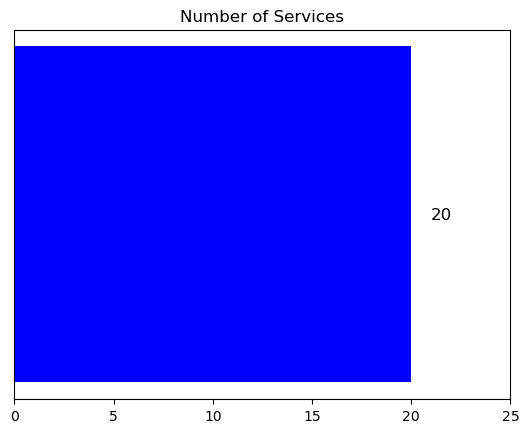

In [7]:
#Task : Visualize the services : - how many services that google have? 
import matplotlib.pyplot as plt
plt.barh([1], len(services), color='blue')
plt.xlim(0, len(services) + 5)  # Adjust the x-axis limits for better visualization
plt.text(len(services) + 1, 1, str(len(services)), va='center', fontsize=12)
plt.yticks([])  # Remove the y-axis
plt.title("Number of Services")
plt.show()
